- To start with BERT
* Following topics need to be covered:
    * seq-seq modeling
    * rnn and lstm model architecture
    * encoder-decoder models
    * Bi-drectional encoders
    * transformer
    * look ahead masking
    * attention mechanism

SEQUENCE LEARNING
-------

#### RNN MODEL
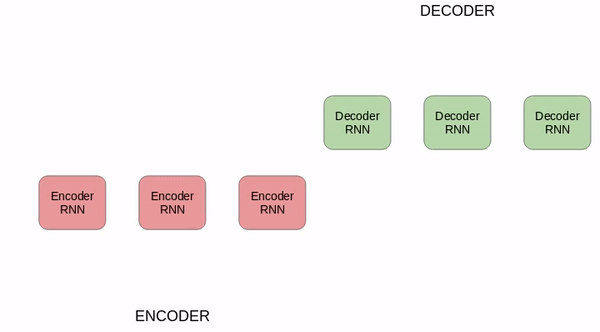

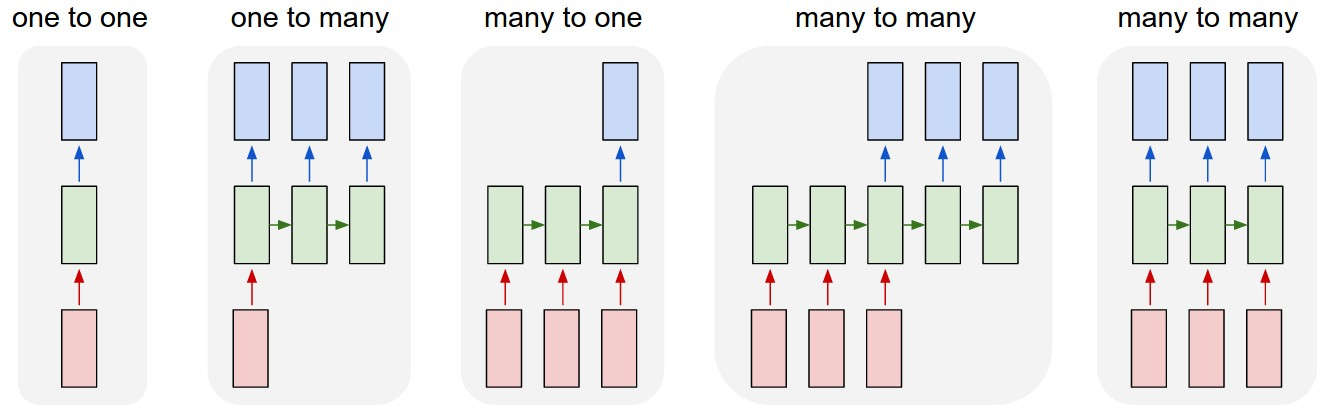

Each rectangle is a vector and arrows represent functions (e.g. __matrix multiply__). Input vectors are in red, output vectors are in blue and green vectors hold the RNN's state (more on this soon). From left to right: (1) __Vanilla mode__ of processing without RNN, from fixed-sized input to fixed-sized output (e.g. `image classification`). (2) Sequence output (e.g. `image captioning` takes an image and outputs a sentence of words). (3) Sequence input (e.g. `sentiment analysis` where a given sentence is classified as expressing positive or negative sentiment). (4) Sequence input and sequence output (e.g. `Machine Translation`: an RNN reads a sentence in English and then outputs a sentence in French). (5) Synced sequence input and output (e.g. `video classification` where we wish to label each frame of the video). Notice that in every case are no pre-specified constraints on the lengths sequences because the recurrent transformation (green) is fixed and can be applied as many times as we like.

| RNN | LSTM | TRANSFOMER |
| --- | --- | --- |
|1. It uses `feedback loop` to retain information of previous state |1. It is `like RNN` with `additional gates` to carefully regulate the information passed on the next cell |1. It is comprise of `Encoder and decoder architecture`, where encoder converts natural langauage into higher dimensional latent space which then feeds into decoder architecture. Decoder unit then interpret its input to generate the output. Transformers are introduced in context of MT(machine translation), so to avoid recursion, `parallel computation` is used. |
| | | The transformer encoder `do not take input sequentially` but it takes the whole sentence(unlike RNN, where we feed word by word to model). Self attention layer get contexts of word by getting hierarchal information of input and it uses Positional embedding to solve the problem of sequential structure of sentences. 
| Following are features of it: 
a. __Sequential Processing__: sentences must be processed word by word ,
b. __Past information is retained through past hidden state__: it follows Markov property, i.e. each state is dependent only on previous state. | Same as RNN | Following are features of it: __Non-sequential__: sentences are processed as whole rather than word by word(`main reason why it doesn't suffer from long dependency issue`), __Self Attention__: compute similarity scores for words in sentence, __Positional Embedding__: to use fixed and learned weights to encode positional information of token in sentence(positional embedding along with multi-head attention, provides relationship b/w different words ).|
| Due to Sequential Processing of RNN model, it can't be trained in parallel. | Same to RNN | It can be trained parallely due to Non sequential learning |
| As it retain past hidden state, enocoding of a specific word is able to retain only for the next time step which is quickly lost after few time steps | LSTM  | |

- How to read RS

https://developer.nvidia.com/blog/how-to-read-research-papers-a-pragmatic-approach-for-ml-practitioners/

https://karpathy.github.io/2015/05/21/rnn-effectiveness/

https://ai.stackexchange.com/questions/20075/why-does-the-transformer-do-better-than-rnn-and-lstm-in-long-range-context-depen

https://baiblanc.github.io/2020/06/21/RNN-vs-CNN-vs-Transformer/

https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/

https://www.kaggle.com/code/gangadharsingh/learning-bert-for-the-first-time/edit

https://www.kaggle.com/code/xhlulu/disaster-nlp-keras-bert-using-tfhub/notebook

https://www.kaggle.com/code/gangadharsingh/bert-for-humans-tutorial-baseline/edit

https://www.kaggle.com/code/gangadharsingh/zero-to-transformers-bert/edit

https://www.analyticsvidhya.com/blog/2020/07/transfer-learning-for-nlp-fine-tuning-bert-for-text-classification/

### RNN for one-one relation
- Image classification
    - MNIST dataset

In [5]:
work_dir = "/workspace/Gangadhar/DL_implementation/"
%ls $work_dir

DRAW/  classifying_names_data/  dataset/  gru.py  lstm.py  rnn.py


In [10]:
!python3 $work_dir"rnn.py"

9920512it [00:14, 702031.09it/s]                                                
Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw
32768it [00:00, 94983.71it/s]                                                   
Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw
1654784it [00:02, 665458.90it/s]                                                
Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw
8192it [00:00, 24606.56it/s]                                                    
Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This 

In [12]:
%%time
!python3 $work_dir"gru.py"

Checking accuracy on training data
Total 58981 / 60000 with accuracy            98.30
Checking accuracy on test data
Total 9813 / 10000 with accuracy            98.13
CPU times: user 224 ms, sys: 42.3 ms, total: 266 ms
Wall time: 24.1 s


In [13]:
%%time
!python3 $work_dir"lstm.py"

Checking accuracy on training data
Total 59086 / 60000 with accuracy            98.48
Checking accuracy on test data
Total 9836 / 10000 with accuracy            98.36
CPU times: user 216 ms, sys: 53 ms, total: 269 ms
Wall time: 24.4 s


### RNN for many-one relation
- Sequence classification

In [48]:
from io import open
import os, string, random, time, math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

from IPython.display import clear_output

import wandb

In [3]:
languages = []

data = []
x = []
y = []

with open("./dataset/name2lang.txt","r") as f:
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        x.append(name)
        y.append(lang)
        data.append((name,lang))
n_languages = len(languages)
print(languages, n_languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian'] 18


In [4]:
data[:10]

[('Abreu', 'Portuguese'),
 ('Albuquerque', 'Portuguese'),
 ('Almeida', 'Portuguese'),
 ('Alves', 'Portuguese'),
 ('Araujo', 'Portuguese'),
 ('Araullo', 'Portuguese'),
 ('Barros', 'Portuguese'),
 ('Basurto', 'Portuguese'),
 ('Belo', 'Portuguese'),
 ('Cabral', 'Portuguese')]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify=y, shuffle=True)
print(len(X_train),len(X_test))

16040 4010


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Russian'),
 Text(1, 0, 'English'),
 Text(2, 0, 'Chinese'),
 Text(3, 0, 'Arabic'),
 Text(4, 0, 'Polish'),
 Text(5, 0, 'Japanese'),
 Text(6, 0, 'Spanish'),
 Text(7, 0, 'Italian'),
 Text(8, 0, 'French'),
 Text(9, 0, 'German'),
 Text(10, 0, 'Dutch'),
 Text(11, 0, 'Korean'),
 Text(12, 0, 'Czech'),
 Text(13, 0, 'Greek'),
 Text(14, 0, 'Scottish'),
 Text(15, 0, 'Irish'),
 Text(16, 0, 'Portuguese'),
 Text(17, 0, 'Vietnamese')]

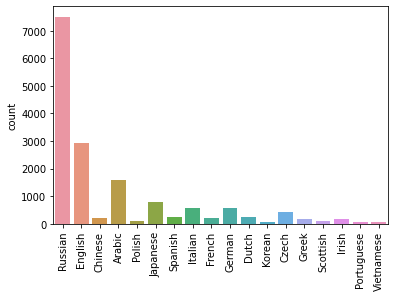

In [152]:
s= sns.countplot(y_train)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

In [115]:
set(y_test)

{'Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese'}

In [6]:
# encoding names
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [7]:
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [8]:
rep = name_rep("Abreu")
print(rep, rep.shape)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [9]:
lang_rep('Portuguese')

tensor([0])

In [10]:
count = {}
for l in languages:
    count[l] = 0
for d in data:
    count[d[1]] += 1
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


In [11]:
clear_output()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


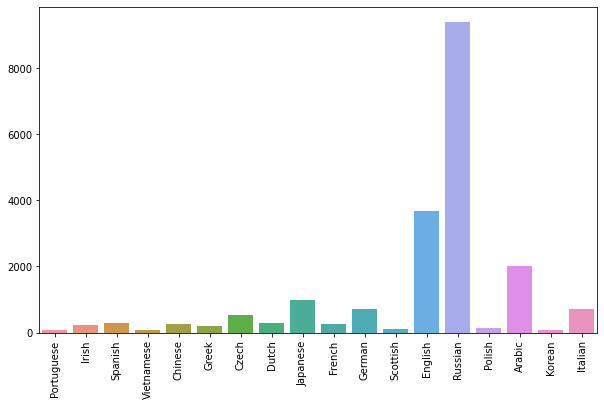

In [26]:
plt.figure(figsize=(10,6))
s = sns.barplot(list(count.keys()), list(count.values()))
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [144]:
# inheriting nn.Module in RNN model
# https://www.educba.com/torch-dot-nn-module/
class RNN_net(nn.Module):
    def __init_(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, inp_, hidden):
        combined = torch.cat((inp_,hidden), 1)
        hidden = self.i2h(combined)
        out = self.i2o(combined)
        out = self.softmax(out)
        return out, hidden
    
    #If hidden values are not defined, we can use this to initialise it
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

# model inference
def infer(net, name='Adam'):
    net.eval()
    name_ohe = name_rep(name)
    hidden = net.init_hidden()

    for i in range(name_ohe.size()[0]):
        #overwriting the output to see the o/p of last layer
        #keep loop back to next model call
        out, hidden = net(name_ohe[i], hidden)
    #softmax function
    return out

# model evaluation
# X: list of names, y_ : list of languages/ nationality
def dataloader(npoints, X_, y_):
    #for returning tuples of: name, language, tensor, lanng_one_hot_encoding
    to_ret = []
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret

# model, number of observation to do evaluation, 
# k: evaluating model on top k accuracy, like top 2 accuracy
def eval(net, n_points, k, X_, y_):
    data_ = dataloader(n_points, X_, y_)
    correct = 0

    for name,lang, name_ohe, lang_rep in data_:
        out = infer(net, name)
        val, indices = out.topk(k)
        
        #pred.append(val)
        if lang_rep in indices:
            correct += 1
        
    accuracy = correct / n_points
    return accuracy

# training the model
# net: model, opt: optimizer, criterion: loss function, n_points: numb_obs to train model
def train(net, opt, criterion, n_points):
    #1. resetting the optimizer to zero gradients, if model is already trained on
    #2. initialize loss to zero
    #3. initialize the dataloader
    #4. Looping dataloader for each epochs
        #a. initializing the hidden layer
        #b. looping through each character of input, compute output and hidden: Create Computation Graph
        #c. computing loss
        #d. compute gradient via backward function
        #e. calculating total loss
    #5. Updating weights and biases via optimizer.step() function
    opt.zero_grad()
    total_loss = 0
    correct = 0
    total_acc = 0
    
    data_ = dataloader(n_points, X_train, y_train)
    
    for name, lang, name_ohe, lang_rep in data_: 
        hidden = net.init_hidden()
        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i], hidden)
        
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss += loss
        
        val, indices = output.topk(1)
        if lang_rep in indices:
            correct += 1
    
    total_acc = correct / n_points
    
    wandb.log({
        "Observation": n_points,
        "Train Loss": total_loss,
        "Train Acc": total_acc})
    
    opt.step()
    return total_loss/ n_points

In [143]:
wandb.init(project="RNN_model")

Observation,1000
Train Loss,2886.07422
Train Acc,0.032
_runtime,5191
_timestamp,1655295643
_step,0


Observation,▁
Train Loss,▁
Train Acc,▁
_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



In [138]:
n_hidden = 256
net = RNN(n_letters, n_hidden, n_languages)

In [139]:
net

RNN(
  (i2h): Linear(in_features=313, out_features=256, bias=True)
  (i2o): Linear(in_features=313, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [129]:
out = infer(net, 'Adam')
index = torch.argmax(out)
print(out, index)

tensor([[-2.9659, -2.8708, -2.8832, -2.8667, -2.8735, -2.8521, -2.9408, -2.8807,
         -2.8187, -2.9134, -2.8980, -2.8582, -2.9386, -2.8451, -2.9861, -2.8491,
         -2.9784, -2.8296]], grad_fn=<LogSoftmaxBackward0>) tensor(8)


In [153]:
eval(net, 100, 5, X_test, y_test)

0.76

wandb: Network error (ReadTimeout), entering retry loop.
wandb: Network error resolved after 0:01:01.472831, resuming normal operation.
wandb: Network error (ReadTimeout), entering retry loop.
wandb: ERROR Error while calling W&B API: internal database error (<Response [500]>)
wandb: ERROR Error while calling W&B API: internal database error (<Response [500]>)
wandb: Network error resolved after 0:05:40.885350, resuming normal operation.


In [140]:
criterion = nn.NLLLoss() # negative log likelihood
opt = optim.SGD(net.parameters(), lr=1e-3, momentum=0.6)

In [150]:
%%time
for e in range(30):
    train(net, opt, criterion, len(y_test))
    test_acc = eval(net, len(y_test), 3, X_test, y_test)
    wandb.log({"Test Acc": test_acc})

CPU times: user 24min 19s, sys: 34.8 s, total: 24min 54s
Wall time: 3min 31s


In [151]:
test_acc

0.6625935162094763